In [63]:
import pandas as pd
snowflake_user = "xiangping@getflex.com"
pd.set_option("mode.chained_assignment", None)

In [ ]:
sequence_query = 

In [2]:
def get_snowflake_query_result(query_file_path: str,
                               snowflake_user: str) -> pd.DataFrame:
    with open(query_file_path, 'r') as file:
        query_commands = file.read()
    # Create Snowflake connection
    cnx = snowflake.connector.connect(
        user=snowflake_user,
        account="jma23782.us-east-1",
        authenticator="externalbrowser"
    )
    # Create cursor and execute query
    cursor = cnx.cursor()
    cursor.execute(query_commands)
    rows = cursor.fetchall()
    df = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])
    cursor.close()
    cnx.close()
    return df

In [3]:
df_sequence_20230101 = get_snowflake_query_result('sql/sequence_query.sql',
                                                  snowflake_user)

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://accounts.google.com/o/saml2/idp?idpid=C03xsf2wk&SAMLRequest=lZJRb9owFIX%2FSuQ9J3YSVqhFQBmsG4wOVtJp25sXG7Bw7MzXaei%2Fn0mK1D60Uh8sWfY5vt%2F1uePpqVLBg7Agjc5QHBEUCF0aLvU%2BQ%2FfFTThCATimOVNGiww9CkDTyRhYpWqaN%2B6g78S%2FRoAL%2FEMaaHeRocZqahhIoJpVAqgr6Ta%2FXdEkIrS2xpnSKPTM8raDAQjrPOHFwkF6vINzNcW4bduoTSNj9zghhGByjb3qLPlw0Z98T6%2FoY0wGZ71XePnmie2T1P0XvIX1txcB%2FVoUm3Cz3hYoyC%2BoM6OhqYTdCvsgS3F%2Ft%2BoBwBMsb%2FMkHY6SqIFQMHBhHIE27U6xoyhNVTfOPxv5Hd4JjpXZS9%2F5Yp6h%2Bij5Wn5mhs3yqx%2Br07p1H9nqVyE3SzHMW34gCzW0X5rl9W%2F3LSElCn5eok3O0S4AGrHQ50CdPyJJGsYkjEdFEtN0QONBNLiK%2F6Bg7gOVmrnOeaFmZWka7SDaG7NXouMz%2BJxegiWvp35Jns1IeoJd0h5RPyW0q2kn7%2B59jJ%2Fbnybuuw9hMd8YJcvH4MbYirnXM4qjuDuRPNx1UioqJlXOuRUAPiulTDuzgjk%2F2M42AuFJX%2FXlaE%2F%2BAw%3D%3D&RelayState=5

In [4]:
df_sequence_20230101.shape

(80614, 84)

In [28]:
# df_sequence_20230101.to_csv('data/sequence_20230101.csv', index=False, sep='|')

In [6]:
# test if the contact and company is 1 to 1 
seq_contact_company_df = df_sequence_20230101.groupby(by=['SEQUENCE_ID', 'CONTACT_ID'])[
    ['CONTACT_COMPANY_NAME']].nunique()

In [7]:
# conclusion is Yes 
seq_contact_company_df[seq_contact_company_df['CONTACT_COMPANY_NAME'] > 1]

,,CONTACT_COMPANY_NAME
SEQUENCE_ID,CONTACT_ID,


In [8]:
print('\n'.join(df_sequence_20230101.columns))

OCCURRED_DATE
SEQUENCE_ID
SEQUENCE_NAME
STEP_ID
TEMPLATE_ID
SEQUENCE_ENROLLMENT_ID
SEQUENCE_STEP_EXCUTION_ID
CONTACT_ID
CONTACT_FIRST_NAME
CONTACT_LAST_NAME
CONTACT_COMPANY_ID
CONTACT_COMPANY_NAME
SENT_COUNT
REPLY_COUNT
OPEN_COUNT
MEETING_BOOKED_COUNT
CONTACT_UPDATE_DATE
CONTACT_ADDRESS
CONTACT_CITY
CONTACT_COMPANY
CONTACT_COUNTRY
CONTACT_CREATE_DATE
CONTACT_CREATE_TIMESTAMP
CONTACT_EAMIL
CONTACT_FIRST_DEAL_CREATE_DATE
CONTACT_ADDITIONAL_EMAIL
CONTACT_EMAIL_DOMAIN
CONTACT_IP_TIMEZONE
CONTACT_IS_UNWORKED
CONTACT_LATEST_SEQUENCE_ENDED_DATE
CONTACT_LATEST_SEQUENCE_ENDED_TIMESTAMP
CONTACT_LATEST_SEQUENCE_ENROLLED_DATE
CONTACT_LATEST_SEQUENCE_ENTROLLED_TIMESTAMP
CONTACT_LEAD_STATUS
CONTACT_SEQUENCES_ENROLLED_COUNT
CONTACT_SEQUENCES_IS_ENROLLED
CONTACT_TIME_BETWEEN_CONTACT_CREATION_AND_DEAL_CREATION
CONTACT_HUBSPOT_OWNER_ID
CONTACT_HUBSPOT_TEAM_ID
CONTACT_JOB_TITLE
CONTACT_LAST_MODIFIED_DATE
CONTACT_LAST_MODIFED_TIMESTAMP
CONTACT_LEAD_SOURCE
CONTACT_LINKEDIN
CONTACT_MOBILE_PHONE
CONTACT_NUM_

In [9]:
#fill None value of performance with 0
subset = ['SENT_COUNT', 'REPLY_COUNT', 'OPEN_COUNT', 'MEETING_BOOKED_COUNT']
df_sequence_20230101.loc[:, subset] = df_sequence_20230101.loc[:, subset].fillna(0).astype(int)

/var/folders/87/68jxvfgs4f91bq6p06d8lzpc0000gp/T/ipykernel_28973/101716187.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_sequence_20230101.loc[:, subset] = df_sequence_20230101.loc[:, subset].fillna(0).astype(int)


In [10]:
seq_contact_company_df = (df_sequence_20230101.groupby(by=['SEQUENCE_ID', 'CONTACT_ID', 'CONTACT_COMPANY_NAME'])
                          .agg(send_count=('SENT_COUNT', 'sum'),
                               reply_count=('REPLY_COUNT', 'sum'),
                               meeting_booked_count=('MEETING_BOOKED_COUNT', 'sum'),
                               open_count=('OPEN_COUNT', 'sum'),
                               contact_job_title=('CONTACT_JOB_TITLE', 'first'),
                               contact_first_name=('CONTACT_FIRST_NAME', 'first'),
                               contact_last_name=('CONTACT_LAST_NAME', 'first'),
                               company_protfolio_type=('COMPANY_PROTFOLIO_TYPE', 'first'),
                               company_protfolio_subtype=('COMPANY_PROTFOLIO_SUBTYPE', 'first'),
                               company_segment=('COMPANY_SEGMENT', 'first'),
                               company_state=('COMPANY_STATE', 'first'),
                               contact_state=('CONTACT_STATE', 'first'),
                               )).reset_index()

In [11]:
seq_contact_company_df

,SEQUENCE_ID,CONTACT_ID,CONTACT_COMPANY_NAME,send_count,reply_count,meeting_booked_count,open_count,contact_job_title,contact_first_name,contact_last_name,company_protfolio_type,company_protfolio_subtype,company_segment,company_state,contact_state
0,1758690,45075501,Gallaher Homes,2,0,0,0,Senior Executive Director,Elizabeth,Valente,Multi Family,None,SMB,CA,None
1,1758690,58750151,Group Fox Management 411E,2,0,0,0,Controller,Suzy,Anderson,Multi Family,Conventional,SMB,IL,None
2,37046485,58748001,TestFlex,2,0,0,1,None,Bri,Soda,Manufactured Homes;Manufacturing Housing;Multi...,Conventional,Deep SMB,None,None
3,37380911,20811,Univesco,4,1,0,6,Assistant VP,Donna,Roden,Multi Family,None,SMB,TX,TX
4,37380911,23077,Schnitzer Properties,4,0,0,1,VP/Operations Manager,Monica,Graham,Multi Family,Conventional,SMB,OR,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24660,91512838,60205851,Royal Oaks & East Garden Apartments,1,0,0,0,None,Rebecca,McGinnis,Multi Family,None,SMB,NY,NJ
24661,91512838,60205852,Royal Oaks & East Garden Apartments,1,0,0,0,None,Mary,Assadoghli,Multi Family,None,SMB,NY,None
24662,91512838,60205853,Royal Oaks & East Garden Apartments,1,0,0,0,Controller,Cheryl,Loeb,Multi Family,None,SMB,NY,NJ
24663,91512838,60205854,Royal Oaks & East Garden Apartments,1,0,0,0,None,Eva,Valenti,Multi Family,None,SMB,NY,None


In [12]:
seq_contact_company_df['reply_count_binary'] = seq_contact_company_df['reply_count'].apply(lambda x: 1 if x > 0 else 0)
seq_contact_company_df['open_count_binary'] = seq_contact_company_df['open_count'].apply(lambda x: 1 if x > 0 else 0)
seq_contact_company_df['meeting_booked_count_binary'] = seq_contact_company_df['meeting_booked_count'].apply(lambda x: 1 if x > 0 else 0)

In [13]:
target = 'reply_count_binary'
seq_contact_company_df['SEQUENCE_ID'].value_counts()

76684087    2113
76373402    2055
87424905     984
79012529     943
76848042     712
            ... 
70608805       1
37046485       1
91194901       1
74522016       1
70468439       1
Name: SEQUENCE_ID, Length: 230, dtype: int64

In [14]:
def cat_encode(df):
    from sklearn.preprocessing import LabelEncoder
    class_map = {}
    for col in df.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        le = le.fit(df[col])
        df[col] = le.transform(df[col])
        df[col] = df[col].astype('category')
        class_map[col] = dict(zip(le.transform(le.classes_), le.classes_))
    return class_map

def chi2_test(X, y):
    from sklearn.feature_selection import chi2, SelectKBest,f_classif
    chi2_selector = SelectKBest(chi2, k='all')
    # chi_ret = chi2_selector.fit_transform(X, y) #transfer_back
    chi2_selector.fit(X, y)
    chi2_scores = pd.DataFrame(list(zip(X.columns, chi2_selector.scores_, chi2_selector.pvalues_)), columns=['ftr', 'score', 'pval'])
    chi2_scores['p_test']= chi2_scores['pval'].apply(lambda x: 'R' if x <= 0.05 else 'NR')
    chi2_scores.sort_values(by=['score'], inplace=True, ascending=False)
    display(chi2_scores)
    return chi2_scores

In [61]:
# import scipy.stats as stats
# # Separate the categorical and numerical variables
# categorical_var = seq_contact_company_df['SEQUENCE_ID']
# numerical_target = seq_contact_company_df[target_col]
# 
# # Perform ANOVA
# f_statistic, p_value = stats.f_oneway(*[numerical_target[categorical_var == category] for category in categorical_var.unique()])
# 
# # Check the p-value
# if p_value < 0.05:
#     print("There is a significant correlation between the categorical variable and the numerical target.")
# else:
#     print("There is no significant correlation between the categorical variable and the numerical target.")

There is a significant correlation between the categorical variable and the numerical target.


In [15]:
def f_oneway_test(df, col_name, col_target):
    import scipy.stats as stats
    categorical_var = df['SEQUENCE_ID']
    numerical_target = df[col_target]
    from scipy.stats import f_oneway
    # Perform ANOVA
    f_statistic, p_value = stats.f_oneway(*[numerical_target[categorical_var == category] for category in categorical_var.unique()])
    
    # Check the p-value
    if p_value < 0.05:
        print(f"There is a significant correlation between the categorical variable {col_name.upper()} and the numerical target {col_target.upper()}")
    else:
        print(f"There is no significant correlation between the categorical variable {col_name.upper()} and the numerical target {col_target.upper()}.")
    return f_statistic, p_value

In [17]:
cat_cols = ['SEQUENCE_ID', 'contact_job_title', 'company_protfolio_type', 'company_protfolio_subtype', 'company_segment', 'company_state', 'contact_state']

target_cols = ['reply_count_binary', 'meeting_booked_count_binary', 'open_count_binary']
for target in target_cols:
    for col in cat_cols:
        f_oneway_test(seq_contact_company_df, col, target)

There is a significant correlation between the categorical variable SEQUENCE_ID and the numerical target REPLY_COUNT_BINARY
There is a significant correlation between the categorical variable CONTACT_JOB_TITLE and the numerical target REPLY_COUNT_BINARY
There is a significant correlation between the categorical variable COMPANY_PROTFOLIO_TYPE and the numerical target REPLY_COUNT_BINARY
There is a significant correlation between the categorical variable COMPANY_PROTFOLIO_SUBTYPE and the numerical target REPLY_COUNT_BINARY
There is a significant correlation between the categorical variable COMPANY_SEGMENT and the numerical target REPLY_COUNT_BINARY
There is a significant correlation between the categorical variable COMPANY_STATE and the numerical target REPLY_COUNT_BINARY
There is a significant correlation between the categorical variable CONTACT_STATE and the numerical target REPLY_COUNT_BINARY
There is no significant correlation between the categorical variable SEQUENCE_ID and the nume

In [18]:
def ANOVA_cat_num_test(df, cat_cols, target_col):
    df_cat = df[cat_cols]
    cat_encode(df_cat)
    X, y = df_cat, df[target_col]
    chi2_test_result = chi2_test(X, y)

In [64]:
target_cols = ['reply_count_binary', 'meeting_booked_count_binary', 'open_count_binary']
for target_col in target_cols:
    print(f'ANOVA test for {target_col.upper()}')
    ANOVA_cat_num_test(seq_contact_company_df, cat_cols, target_col)

ANOVA test for REPLY_COUNT_BINARY


KeyError: "['TEMPLATE_ID'] not in index"

In [20]:
template_seq_contact_company_df = (df_sequence_20230101.groupby(by=['SEQUENCE_ID', 'CONTACT_ID', 'CONTACT_COMPANY_NAME', 'TEMPLATE_ID'])
                          .agg(send_count=('SENT_COUNT', 'sum'),
                               reply_count=('REPLY_COUNT', 'sum'),
                               meeting_booked_count=('MEETING_BOOKED_COUNT', 'sum'),
                               open_count=('OPEN_COUNT', 'sum'),
                               contact_job_title=('CONTACT_JOB_TITLE', 'first'),
                               contact_first_name=('CONTACT_FIRST_NAME', 'first'),
                               contact_last_name=('CONTACT_LAST_NAME', 'first'),
                               company_protfolio_type=('COMPANY_PROTFOLIO_TYPE', 'first'),
                               company_protfolio_subtype=('COMPANY_PROTFOLIO_SUBTYPE', 'first'),
                               company_segment=('COMPANY_SEGMENT', 'first'),
                               company_state=('COMPANY_STATE', 'first'),
                               contact_state=('CONTACT_STATE', 'first'),
                               )).reset_index()
template_seq_contact_company_df

,SEQUENCE_ID,CONTACT_ID,CONTACT_COMPANY_NAME,TEMPLATE_ID,send_count,reply_count,meeting_booked_count,open_count,contact_job_title,contact_first_name,contact_last_name,company_protfolio_type,company_protfolio_subtype,company_segment,company_state,contact_state
0,1758690,45075501,Gallaher Homes,17748430,1,0,0,0,Senior Executive Director,Elizabeth,Valente,Multi Family,None,SMB,CA,None
1,1758690,45075501,Gallaher Homes,17748531,1,0,0,0,Senior Executive Director,Elizabeth,Valente,Multi Family,None,SMB,CA,None
2,1758690,58750151,Group Fox Management 411E,17748430,1,0,0,0,Controller,Suzy,Anderson,Multi Family,Conventional,SMB,IL,None
3,1758690,58750151,Group Fox Management 411E,17748531,1,0,0,0,Controller,Suzy,Anderson,Multi Family,Conventional,SMB,IL,None
4,37046485,58748001,TestFlex,14198716,1,0,0,0,None,Bri,Soda,Manufactured Homes;Manufacturing Housing;Multi...,Conventional,Deep SMB,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78188,91512838,60205851,Royal Oaks & East Garden Apartments,50091173,1,0,0,0,None,Rebecca,McGinnis,Multi Family,None,SMB,NY,NJ
78189,91512838,60205852,Royal Oaks & East Garden Apartments,50091173,1,0,0,0,None,Mary,Assadoghli,Multi Family,None,SMB,NY,None
78190,91512838,60205853,Royal Oaks & East Garden Apartments,50091173,1,0,0,0,Controller,Cheryl,Loeb,Multi Family,None,SMB,NY,NJ
78191,91512838,60205854,Royal Oaks & East Garden Apartments,50091173,1,0,0,0,None,Eva,Valenti,Multi Family,None,SMB,NY,None


In [21]:
template_seq_contact_company_df['reply_count_binary'] = template_seq_contact_company_df['reply_count'].apply(lambda x: 1 if x > 0 else 0)
template_seq_contact_company_df['open_count_binary'] = template_seq_contact_company_df['open_count'].apply(lambda x: 1 if x > 0 else 0)
template_seq_contact_company_df['meeting_booked_count_binary'] = template_seq_contact_company_df['meeting_booked_count'].apply(lambda x: 1 if x > 0 else 0)

In [65]:
cat_cols = ['SEQUENCE_ID','TEMPLATE_ID', 'contact_job_title', 'company_protfolio_type', 'company_protfolio_subtype', 'company_segment', 'company_state', 'contact_state']
target_cols = ['reply_count_binary', 'meeting_booked_count_binary', 'open_count_binary']
for target_col in target_cols:
    print(f'ANOVA test for {target_col.upper()}')
    ANOVA_cat_num_test(template_seq_contact_company_df, cat_cols, target_col)

ANOVA test for REPLY_COUNT_BINARY


,ftr,score,pval,p_test
1,TEMPLATE_ID,15727.437177,0.000000e+00,R
0,SEQUENCE_ID,5238.628930,0.000000e+00,R
4,company_protfolio_subtype,161.323270,5.814830e-37,R
6,company_state,80.470162,2.951279e-19,R
7,contact_state,32.541319,1.166852e-08,R
2,contact_job_title,9.878231,1.672457e-03,R
3,company_protfolio_type,1.032470,3.095793e-01,NR
5,company_segment,0.136770,7.115131e-01,NR


ANOVA test for MEETING_BOOKED_COUNT_BINARY


,ftr,score,pval,p_test
2,contact_job_title,234.656998,5.751382e-53,R
6,company_state,87.665637,7.750937e-21,R
4,company_protfolio_subtype,59.770913,1.065667e-14,R
7,contact_state,32.664968,1.094930e-08,R
1,TEMPLATE_ID,1.706002,1.915049e-01,NR
5,company_segment,0.376981,5.392233e-01,NR
3,company_protfolio_type,0.247167,6.190770e-01,NR
0,SEQUENCE_ID,0.021515,8.833834e-01,NR


ANOVA test for OPEN_COUNT_BINARY


,ftr,score,pval,p_test
1,TEMPLATE_ID,33177.138724,0.000000e+00,R
0,SEQUENCE_ID,11247.823735,0.000000e+00,R
7,contact_state,1374.194244,8.513572e-301,R
2,contact_job_title,1054.769250,2.237268e-231,R
5,company_segment,65.260762,6.561488e-16,R
3,company_protfolio_type,28.311080,1.033030e-07,R
6,company_state,16.819873,4.110064e-05,R
4,company_protfolio_subtype,3.769791,5.218615e-02,NR


In [23]:
target_cols = ['reply_count_binary', 'meeting_booked_count_binary', 'open_count_binary']
for target in target_cols:
    for col in cat_cols:
        f_oneway_test(template_seq_contact_company_df, col, target)

There is a significant correlation between the categorical variable SEQUENCE_ID and the numerical target REPLY_COUNT_BINARY
There is a significant correlation between the categorical variable TEMPLATE_ID and the numerical target REPLY_COUNT_BINARY
There is a significant correlation between the categorical variable CONTACT_JOB_TITLE and the numerical target REPLY_COUNT_BINARY
There is a significant correlation between the categorical variable COMPANY_PROTFOLIO_TYPE and the numerical target REPLY_COUNT_BINARY
There is a significant correlation between the categorical variable COMPANY_PROTFOLIO_SUBTYPE and the numerical target REPLY_COUNT_BINARY
There is a significant correlation between the categorical variable COMPANY_SEGMENT and the numerical target REPLY_COUNT_BINARY
There is a significant correlation between the categorical variable COMPANY_STATE and the numerical target REPLY_COUNT_BINARY
There is a significant correlation between the categorical variable CONTACT_STATE and the numer

In [5]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
target = 'reply_count_binary'
X = seq_contact_company_df[['SEQUENCE_ID', 
                            'contact_job_title', 
                            'company_protfolio_type', 
                            'company_protfolio_subtype', 
                            'company_segment',
                           'company_state',
                           'contact_state']]  # Adjust 'target' to your target variable's name
y = seq_contact_company_df[target]

In [54]:
X

,SEQUENCE_ID,contact_job_title,company_protfolio_type,company_protfolio_subtype,company_segment,company_state,contact_state
0,0,3332,16,36,4,7,104
1,0,693,16,11,4,23,104
2,1,4283,8,11,0,85,104
3,2,258,16,36,4,70,86
4,2,3933,16,11,4,60,10
...,...,...,...,...,...,...,...
24660,229,4283,16,36,4,52,60
24661,229,4283,16,36,4,52,104
24662,229,693,16,36,4,52,60
24663,229,4283,16,36,4,52,104


In [55]:
type(X['SEQUENCE_ID'])
for col in X.columns: print(type(X[col]))
# t = seq_contact_company_df
# cat_encode(t)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [56]:
cat_encode(X)
X

/var/folders/87/68jxvfgs4f91bq6p06d8lzpc0000gp/T/ipykernel_28973/135595027.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])
/var/folders/87/68jxvfgs4f91bq6p06d8lzpc0000gp/T/ipykernel_28973/135595027.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
/var/folders/87/68jxvfgs4f91bq6p06d8lzpc0000gp/T/ipykernel_28973/135595027.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,SEQUENCE_ID,contact_job_title,company_protfolio_type,company_protfolio_subtype,company_segment,company_state,contact_state
0,0,3332,16,36,4,7,104
1,0,693,16,11,4,23,104
2,1,4283,8,11,0,85,104
3,2,258,16,36,4,70,86
4,2,3933,16,11,4,60,10
...,...,...,...,...,...,...,...
24660,229,4283,16,36,4,52,60
24661,229,4283,16,36,4,52,104
24662,229,693,16,36,4,52,60
24663,229,4283,16,36,4,52,104


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
lgb_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='binary_logloss',
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.9
)

lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


LGBMClassifier(feature_fraction=0.9, learning_rate=0.05,
               metric='binary_logloss', objective='binary')

In [60]:
y_pred = lgb_model.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9481046016622745
Confusion Matrix:
[[4676    1]
 [ 255    1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4677
           1       0.50      0.00      0.01       256

    accuracy                           0.95      4933
   macro avg       0.72      0.50      0.49      4933
weighted avg       0.93      0.95      0.92      4933


<Axes: ylabel='reply_count_binary'>

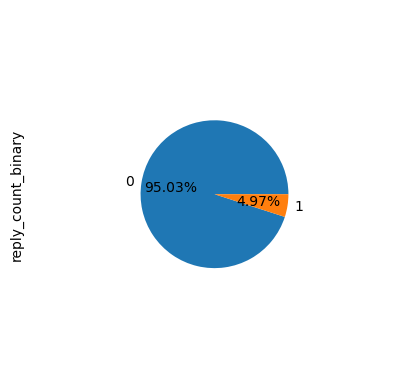

In [62]:
seq_contact_company_df[target].value_counts().plot(kind='pie', autopct='%0.2f%%', radius=0.5)

In [1]:
import lightgbm as lgb